
## Activity 1: Digital Image Formation and Ehancement

Mary Franczine Tan <br>
Applied Physics 157 WFY-WFX-1 <br>
Submitted March 4, 2023

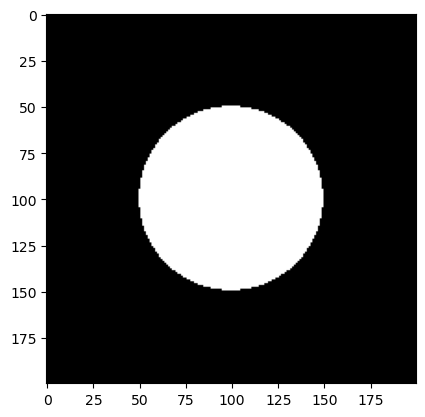

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 200 #the higher num is the finer 
x = np.linspace(-1,1,num = N)
y=x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R)) 
A[np.where(R<0.5)] = 1.0 # changes the radius of the circle
# conditional to determine kung alin yung white

#display as an image
plt.imshow(A, cmap = "gray")

#display as a 3D surface in Cartesian coordinates
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = Axes3D(fig) 
ax.plot_surface(X,Y,A)

In [2]:
# sinusoidal wave
from math import pi

N = 400 # drawing size
x = np.linspace(-2, 2, num = N) # x values
y = x # y values
f = 4 # frequency

X,Y = np.meshgrid(x,y) # create mesh grid
R = np.sin(2 * pi * f * X) # find sin wave values
R_normalized = 255 * (R + 1) / 2 # normalize the values

#display as a 3D surface in Cartesian coordinates
fig = plt.figure()
ax = Axes3D(fig) 
ax.plot_surface(X,Y,R)

<Figure size 640x480 with 0 Axes>

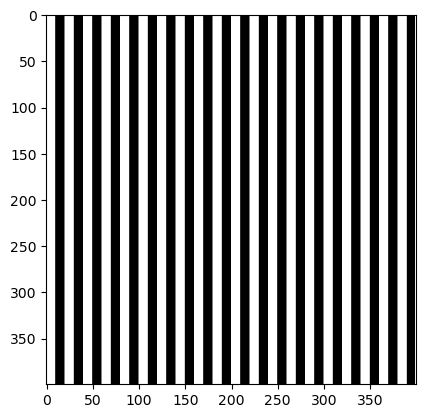

In [3]:
# grating

from scipy import signal

N = 400 # drawing size
x = np.linspace(-2, 2, num = N) # x values
y = x # y values
f = 5 # frequency

X,Y = np.meshgrid(x,y) # create mesh grid
R = signal.square(2 * pi * f * X) # find sin wave values
R_normalized = 255 * (R + 1) / 2 # normalize the values

# show image
plt.imshow(R, cmap = "gray")


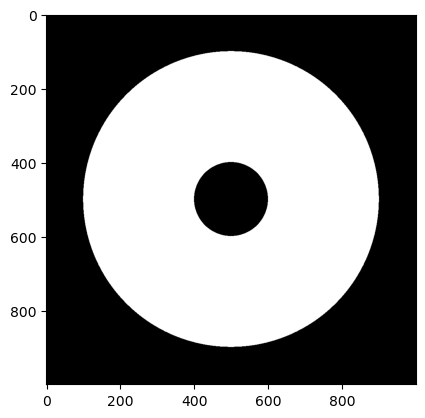

<Figure size 640x480 with 0 Axes>

In [4]:
# Hubble

N = 1000 #the higher num is the finer 
x = np.linspace(-1,1,num = N) # declare x values
y = x # declare y values
X,Y = np.meshgrid(x,y) # create meshgrid

## main circle

R = np.sqrt(X**2 + Y**2) # find values of r
A = np.zeros(np.shape(R)) # create empty array
A[np.where(R<0.8)] = 1.0 # set citcle radius

## hole in circle

R_inner = np.sqrt(X**2 + Y**2)
A_inner = np.zeros(np.shape(R)) 
A_inner[np.where(R<0.2)] = 1.0

# subtract arrays to create hubble shape
A_hubble = A - A_inner

#display as an image
plt.imshow(A_hubble, cmap = "gray")

#display as a 3D surface in Cartesian coordinates
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = Axes3D(fig) 
ax.plot_surface(X,Y,A_hubble)

source for the hexagon eme: https://www.geeksforgeeks.org/matplotlib-patches-regularpolygon-class-in-python/

plan of attack:

- list of of points na may hex dapat
- convert the y-coord to radians
- plot hexes
- show plot
- hope wala error lmao

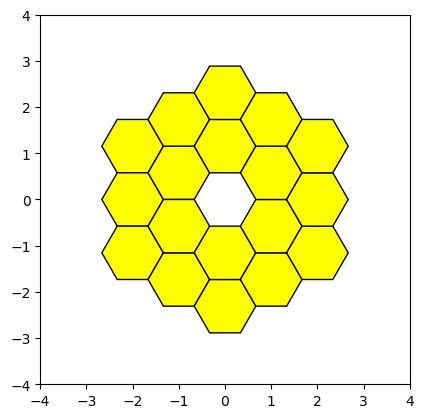

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np


coord = [[-2, 2, 0],[-2, 0, 0],[-2, 0, 2],[-1, -3, 0],[-1, 1, 0],[-1, 0, 1],[-1, 3, 0],[0, -2, 2],[0, -1, 1],
         [0, 1, -1],[0, 2, -2],[1, -3, 0],[1, -1, 0],[1, 0, -1],[1, 3, 0],[2, -2, 0],[2, 0, 0],[2, 2, 0]]


# Horizontal cartesian coords
hcoord = [c[0] for c in coord]

# Vertical cartesian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3. for c in coord]

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

# Add some coloured hexagons
for x, y in zip(hcoord, vcoord):

    # matplotlib understands lower
    # case words for colours
    color = 'yellow'
    hex = RegularPolygon((x, y), numVertices = 6, radius = 2. / 3., orientation = np.radians(30),
                        facecolor = color, alpha = 1, edgecolor ='k')
    ax.add_patch(hex)

    
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()


image of grid for hexagon: https://stackoverflow.com/questions/46525981/how-to-plot-x-y-z-coordinates-in-the-shape-of-a-hexagonal-grid

### Activity 1.2 Color Image

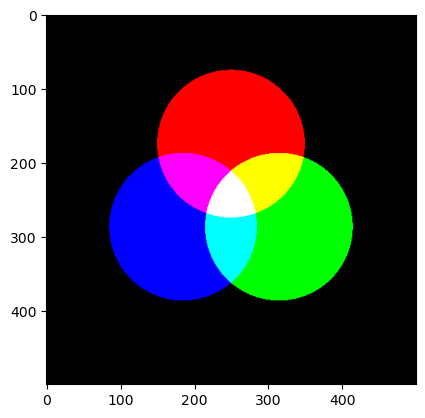

In [6]:
N = 500
x = np.linspace(-10,10,num = N) 
y = x
X,Y = np.meshgrid(x,y)
Rd, Gn, Bl = np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N))

#draw colored circles
Rt, Rc, deg = 3, 4, 30
xt, yt = Rt*np.cos(deg*np.pi/180), Rt*np.sin(deg*np.pi/180)
R = np.sqrt((X)**2 + (Y+Rt)**2) 
Rd[np.where(R<Rc)]=1.0
R = np.sqrt((X-xt)**2 + (Y-yt)**2) 
Gn[np.where(R<Rc)]=1.0
R = np.sqrt((X+xt)**2 + (Y-yt)**2) 
Bl[np.where(R<Rc)]=1.0
I = np.zeros((N,N,3))

I[...,0] = Rd
I[...,1] = Gn
I[...,2] = Bl
fig = plt.figure()
plt.imshow(I)

## to do

- gawing list yung color argument (para one call nalang for each shape)
- add for loop dun sa createColoredCircle
- figure out how to make the background white
- figure out how to make a black color

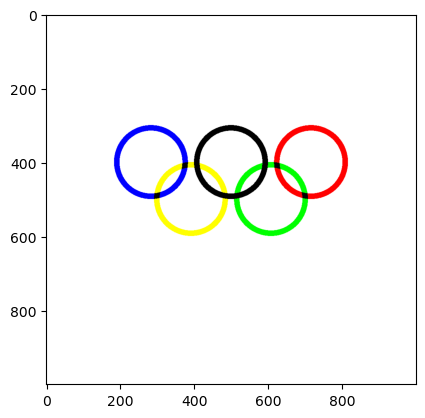

In [7]:
N = 1000 # set figure size
x = np.linspace(-10,10,num = N) # x-values
y = x # y-values
X,Y = np.meshgrid(x,y) # create meshgrid
Rd, Gn, Bl = np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N)) # arrays for pixels with Red, Green, Blue values

Rt, Rc, Ri, deg = 3, 2, 1.7, 30

def createColoredCircle(x, y, color):
    
    loop = np.zeros((N,N))
    dx, dy = x*np.cos(deg*np.pi/180), y*np.sin(deg*np.pi/180)

    R = np.sqrt((X+dx)**2 + (Y-dy)**2)
    loop[np.where(R<Rc)] = 1
    R_inner = np.sqrt((X+dx)**2 + (Y-dy)**2)
    
    loop[np.where(R_inner<Ri)] = 0

    color[np.where(loop==1)] = 0
    
    return

def circle(x, y, colors):
    
    for c in colors:
        createColoredCircle(x,y,c)

I = np.zeros((N,N,3))

Rd[np.where(Rd == 0)] = 1.0
Gn[np.where(Gn == 0)] = 1.0
Bl[np.where(Bl == 0)] = 1.0

circle(-2.5, 0, [Rd, Bl]) # green
circle(-5,-4,[Gn, Bl]) # red
circle(0,-4,[Rd, Gn, Bl]) # black
circle(5,-4,[Rd, Gn]) # blue
circle(2.5,0,[Bl]) # yellow

I[...,0] = Rd
I[...,1] = Gn
I[...,2] = Bl

fig = plt.figure()
plt.imshow(I)

### 1.3 Altering the Input-Output Curve

to do's
- show yung images here

### 1.4 Histogram Backprojection on Grayscale Images

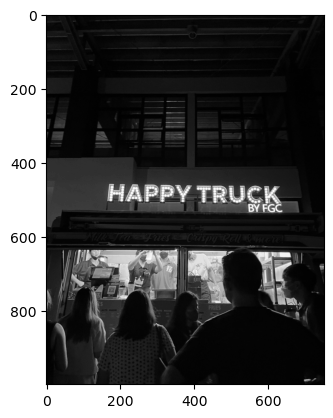

In [13]:
import matplotlib.image as mpimg

img = mpimg.imread('IMG_1002.jpg')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img_gray = rgb2gray(img)

plt.imshow(img_gray, cmap='gray') # show image

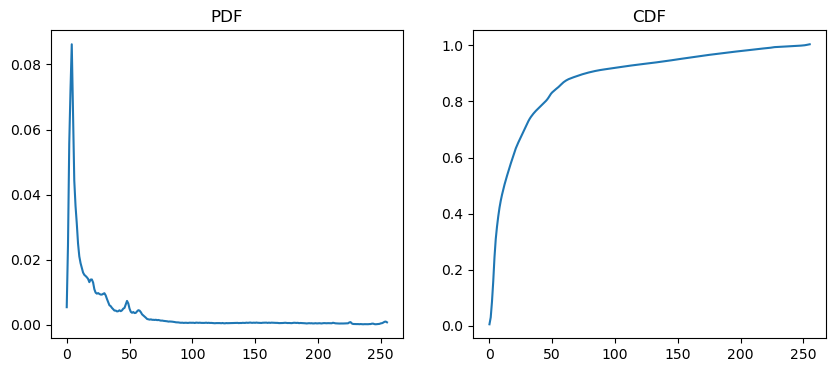

In [98]:
hist, bins = np.histogram(img_gray,bins=256, density=True)
CDF = hist.cumsum()

fig1, axes = plt.subplots(1,2, figsize=(10,4))


axes[0].plot(hist)
axes[0].set_title('PDF')

axes[1].plot(CDF)
axes[1].set_title('CDF')

plt.show()

to do 
- dataframe containing original grayscale, cdf, new grayscale (basically * 255 for linear case)
- loop over image para palitan yung og grayscale to new
- sana di mag error wooot

sources for this item:
- sir kenneth and rene


- flatten image
- use np.interp -> np.interp(old_cdf, x, new_cdf)

In [52]:
x = np.linspace(0,256,256)
desiredCDF = x / 255

img_flat = img_gray.flatten()

newGS = np.interp(CDF, x, desiredCDF)

,old,new
0,0.005440,0.000021
1,0.030027,0.000118
2,0.085721,0.000336
3,0.157992,0.000620
4,0.244204,0.000958
...,...,...
251,1.000537,0.003924
252,1.001248,0.003926
253,1.002197,0.003930
254,1.003225,0.003934


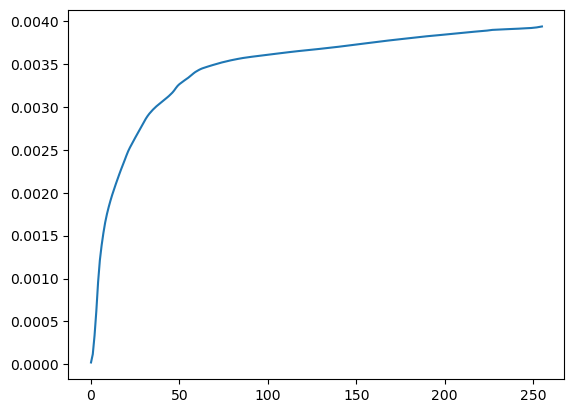

In [59]:
import pandas as pd

values = pd.DataFrame({'old': CDF, 'new':newGS})
display(values)

plt.plot(newGS)

In [69]:
new_img = img_gray

for i in range(len(CDF)):
    new_img[np.where(img_gray == values['old'][i])] = values['new'][i] 

In [102]:
new_img = img_gray / 255

In [68]:
values['old'][0]

0.005440460385907873

In [81]:
print(img_gray)

[[20.2861 14.2867 15.2866 ... 12.7707 14.7705 11.7708]
 [18.2863 14.2867 16.2865 ... 13.7706 16.7703 15.7704]
 [16.2865 15.2866 18.2863 ... 13.1297 13.1297 10.13  ]
 ...
 [ 8.0701  7.0702  6.0703 ...  7.0702  7.0702  8.0701]
 [10.0699  9.07    8.0701 ...  7.0702  7.0702  7.0702]
 [ 3.0706  4.0705  6.0703 ...  8.0701  9.07   11.0698]]


In [103]:
print(new_img)

[[0.07955333 0.05602627 0.05994745 ... 0.05008118 0.05792353 0.04616   ]
 [0.07171098 0.05602627 0.06386863 ... 0.05400235 0.06576588 0.06184471]
 [0.06386863 0.05994745 0.07171098 ... 0.05148902 0.05148902 0.03972549]
 ...
 [0.03164745 0.02772627 0.0238051  ... 0.02772627 0.02772627 0.03164745]
 [0.0394898  0.03556863 0.03164745 ... 0.02772627 0.02772627 0.02772627]
 [0.01204157 0.01596275 0.0238051  ... 0.03164745 0.03556863 0.04341098]]


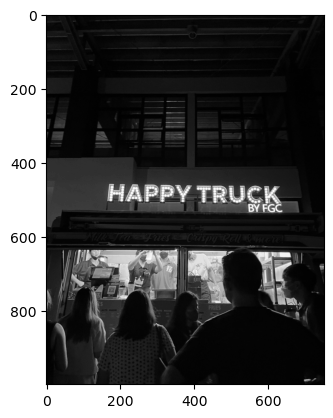

In [104]:
plt.imshow(new_img, cmap='gray') # show image

In [ ]:
def interpT(r):
    return np.interp(r, x, CDF)

def interpback(T):
    return np.interp(T, g, x)

c = 0

for i in range(rows):
    T = list(map(interpT, gray))

### 1.5 Contrast Enhancement

### 1.6 Restoring Faded Color Photographs